In [1]:
import os
import re
import pandas as pd
import datetime
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
from tkinter.filedialog import askopenfilename

In [2]:
def getFolderPath():
    root = Tk()
    root.withdraw()
    folder_selected = filedialog.askdirectory()
    #folderPath.set(folder_selected)
    root.destroy()
    return (folder_selected)

In [11]:
cur_dir = getFolderPath()

In [12]:
file_vec = []
file_vec_short = []
for root, dirs, files in os.walk(cur_dir):
    for file in files:
        if file.endswith(".out"):
            current_way = os.path.join(root,file)
            current_file = os.path.join(file)
            file_vec.append(current_way)
            file_vec_short.append(current_file)

In [13]:
values_kcal_glob = []
values_kJ_glob = []
files = []
for file in file_vec:
    with open(str(file), "r") as f:
        #switch = 0
        lines = f.readlines()
        for line in lines:
            therm_prop = re.search('\s([A-Z]{3})\.\s', line)
            if 'FINAL HEAT OF FORMATION' in line:
                values_kcal = []
                values_kJ = []
                line_vec = line.split('=')
                value_1 = re.search('-?(\d+\.\d+)',line_vec[1])
                value_2 = re.search('-?(\d+\.\d+)',line_vec[2])
                values_kcal.append(float(value_1.group(0)))
                values_kJ.append(float(value_2.group(0)))           
    values_kcal_glob.append(values_kcal[0])
    values_kJ_glob.append(values_kJ[0])
    for name in file_vec_short:
        if name in file:
            files.append(name)

In [14]:
#data_therm_FHF = pd.DataFrame({"kcal/mol":pd.Series(values_kcal_therm,index = therm_files), "kJ/mol":pd.Series(values_kJ_therm,index = therm_files)})
data_FHF = pd.DataFrame({"kcal/mol":pd.Series(values_kcal_glob, index = files), "kJ/mol":pd.Series(values_kJ_glob, index = files)})
data_FHF.index.names = ['file']
data_FHF = data_FHF.sort_values(['kcal/mol'])

In [16]:
now = datetime.datetime.now()
newpath = str(cur_dir)+'/MOPAC_parsed/'
if not os.path.exists(newpath):
    os.makedirs(newpath)
data_FHF.to_csv(str(newpath)+str(now.strftime("%d-%m-%Y_%H-%M"))+'_FHF.csv')

In [15]:
print(data_FHF)

                  kcal/mol      kJ/mol
file                                  
water_30.out   -1925.49116 -8056.25502
water_30_4.out -1917.51567 -8022.88555
water_30_2.out -1916.22707 -8017.49404
water_30_8.out -1913.68595 -8006.86202
water_30_6.out -1901.55674 -7956.11339
...                    ...         ...
water_4_2.out   -238.52476  -997.98759
water_4.out     -238.26272  -996.89124
water_4_3.out   -236.43024  -989.22412
water_3.out     -176.70248  -739.32316
water_2.out     -116.08616  -485.70451

[326 rows x 2 columns]


In [47]:
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

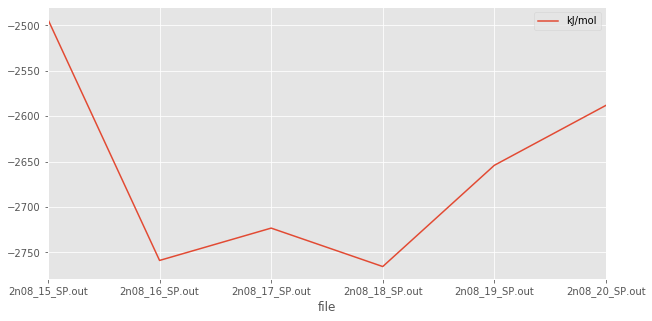

In [71]:
plt.show(data_therm.plot(y='kJ/mol', figsize = (10,5)))

In [117]:
data_therm.reset_index(level=0, inplace=True)
print(data_therm)

        file    T,K  H.O.F,KCAL/MOL  ENTHALPY,CAL/MOLE  \
0    1-1.out  200.0        -945.631         28671.9516   
1    1-2.out  200.0        -963.097         27459.4992   
2    1-3.out  200.0        -948.904         27699.5165   
3    1-4.out  200.0        -959.094         27872.5889   
4    1-5.out  200.0        -963.499         27344.7002   
..       ...    ...             ...                ...   
457  3-3.out  400.0        -891.592         97529.5124   
458  3-4.out  400.0        -883.635         97353.7077   
459  3-5.out  400.0        -888.497         97866.2132   
460  3-6.out  400.0        -910.983         96286.0520   
461  3-7.out  400.0        -875.907         98395.7532   

     HEAT CAPACITY,CAL/K/MOL  ENTROPY,CAL/K/MOL  
0                   249.1681           368.0844  
1                   245.9002           345.6138  
2                   245.7887           350.8803  
3                   247.5770           348.1672  
4                   244.6529           339.8919  
.. 

In [137]:
import scipy
#data_therm.reset_index(level=0, inplace=True)
#data_therm['H.O.F,KCAL/MOL'].applymap(lambda x : x[0])
#data_therm.plot.scatter(x = 'T,K', y = 'ENTROPY,CAL/K/MOL')
#data_therm.plot.hist(x = 'T,K')
plt.show(data_therm['ENTROPY,CAL/K/MOL'].plot(x = 'T,K', kind = 'kde',figsize = (20,10), stacked = True))

ModuleNotFoundError: No module named 'scipy'

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, marker=m)

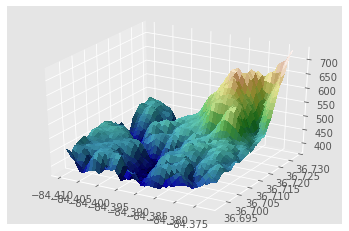

In [97]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

# Load and format data
with cbook.get_sample_data('jacksboro_fault_dem.npz') as file, \
     np.load(file) as dem:
    z = dem['elevation']
    nrows, ncols = z.shape
    x = np.linspace(dem['xmin'], dem['xmax'], ncols)
    y = np.linspace(dem['ymin'], dem['ymax'], nrows)
    x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)